# Week 4 Notebook - Linear Regression, Linear Discriminant, Logistic Regression

## Basis Functions

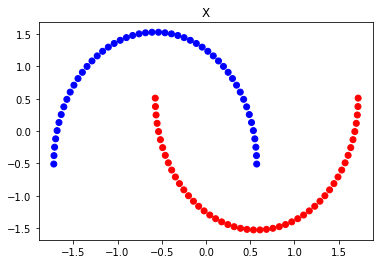

C:\Users\Joe Cruz\Anaconda2\envs\Python3_2\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in log


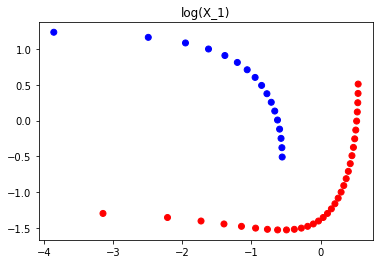

C:\Users\Joe Cruz\Anaconda2\envs\Python3_2\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in log


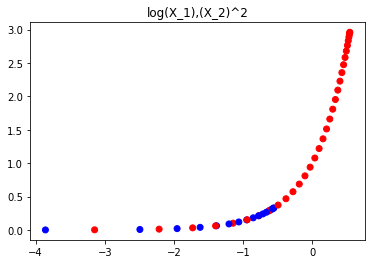

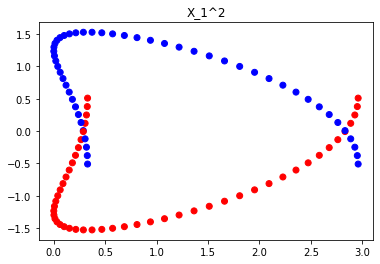

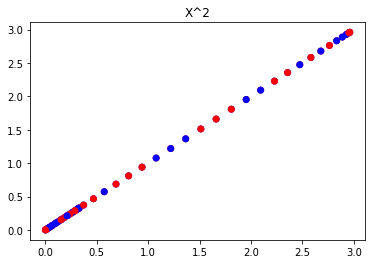

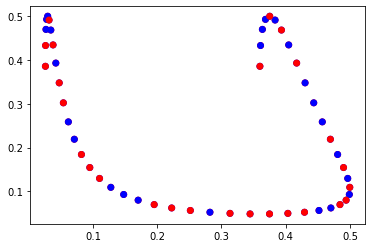

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs
from sklearn import preprocessing

X, y = make_moons(n_samples=100)
#X, y = make_blobs(n_samples=100)


X = preprocessing.StandardScaler().fit_transform(X)

plt.title('X')
plt.scatter(X[:,0],X[:,1], c=y, alpha=1, cmap=plt.cm.bwr)
plt.show()

X1 = np.log(X[:,0])
plt.title('log(X_1)')
plt.scatter(X1,X[:,1], c=y, alpha=1, cmap=plt.cm.bwr)
plt.show()

X1 = np.log(X[:,0])
X2 = np.square(X[:,0])
plt.title('log(X_1),(X_2)^2')
plt.scatter(X1,X2, c=y, alpha=1, cmap=plt.cm.bwr)
plt.show()

X1 = np.square(X[:,0])
plt.title('X_1^2')
plt.scatter(X1,X[:,1], c=y, alpha=1, cmap=plt.cm.bwr)
plt.show()

X2 = np.square(X[:,0])
plt.title('X^2')
plt.scatter(X1,X2, c=y, alpha=1, cmap=plt.cm.bwr)
plt.show()

X1_mm = np.exp(-((X[:,0] - X[:,0].mean()))**2)/2
X2_mm = np.exp(-((X[:,1] - X[:,1].mean()))**2)/2
X2 = np.square(X[:,0])
plt.scatter(X1_mm,X2_mm, c=y, alpha=1, cmap=plt.cm.bwr)
plt.show()

## Manifold Learning

Sources for this code are Rashcka <a href="http://sebastianraschka.com/Articles/2014_kernel_pca.html">Kernel tricks and nonlinear dimensionality reduction via RBF kernel PCA</a> and Jake Vanderplas <a href="http://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html">sklearn: Comparison of Manifold Learning methods</a>

C:\Users\Joe Cruz\Anaconda2\envs\Python3_2\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  from ipykernel import kernelapp as app
C:\Users\Joe Cruz\Anaconda2\envs\Python3_2\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


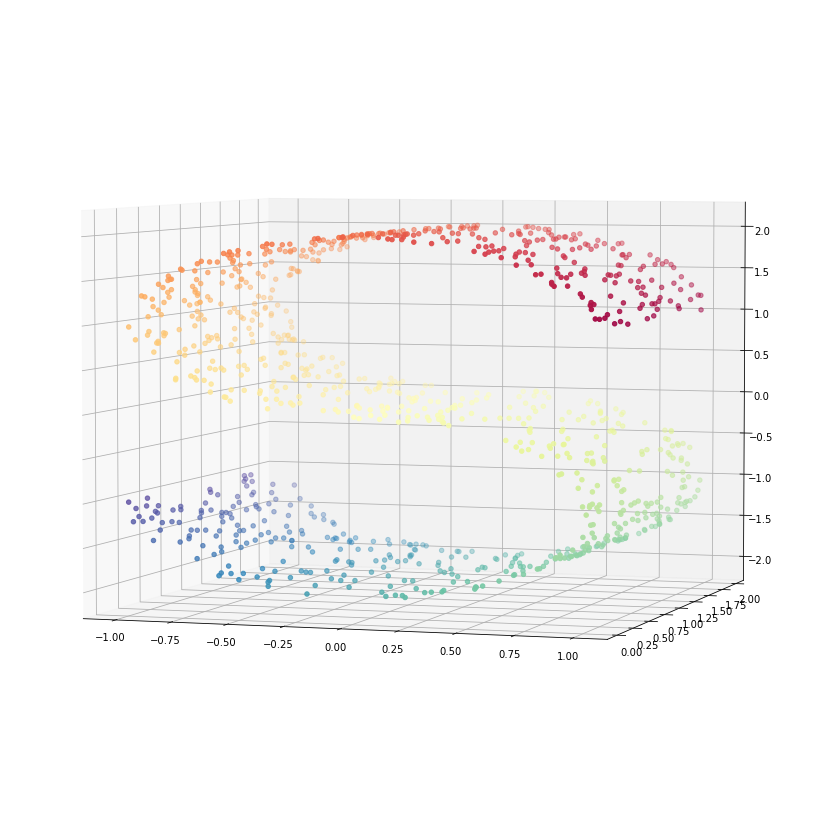

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import manifold, datasets

n_points = 1000
X, color = datasets.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

fig = plt.figure(figsize=(20, 15))
plt.title("Manifold Learning")

ax = fig.gca(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)
plt.show()

In [3]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def stepwise_kpca(X, gamma, n_components):
    """
    Implementation of a RBF kernel PCA.

    Arguments:
        X: A MxN dataset as NumPy array where the samples are stored as rows (M),
           and the attributes defined as columns (N).
        gamma: A free parameter (coefficient) for the RBF kernel.
        n_components: The number of components to be returned.

    Returns the k eigenvectors (alphas) that correspond to the k largest
        eigenvalues (lambdas).

    """
    # Calculating the squared Euclidean distances for every pair of points
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Converting the pairwise distances into a symmetric MxM matrix.
    mat_sq_dists = squareform(sq_dists)

    # Computing the MxM kernel matrix.
    K = exp(-gamma * mat_sq_dists)

    # Centering the symmetric NxN kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K_norm = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenvalues in descending order with corresponding
    # eigenvectors from the symmetric matrix.
    eigvals, eigvecs = eigh(K_norm)

    # Obtaining the i eigenvectors (alphas) that corresponds to the i highest eigenvalues (lambdas).
    alphas = np.column_stack((eigvecs[:,-i] for i in range(1,n_components+1)))
    lambdas = [eigvals[-i] for i in range(1,n_components+1)]

    return alphas, lambdas

C:\Users\Joe Cruz\Anaconda2\envs\Python3_2\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
C:\Users\Joe Cruz\Anaconda2\envs\Python3_2\lib\site-packages\ipykernel_launcher.py:40: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


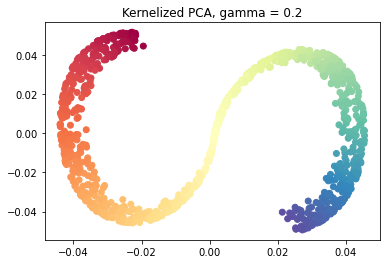

In [4]:
Y = stepwise_kpca(X, gamma=0.2, n_components=2)[0]
plt.title('Kernelized PCA, gamma = 0.2')
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral);
plt.show()

C:\Users\Joe Cruz\Anaconda2\envs\Python3_2\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
C:\Users\Joe Cruz\Anaconda2\envs\Python3_2\lib\site-packages\ipykernel_launcher.py:40: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


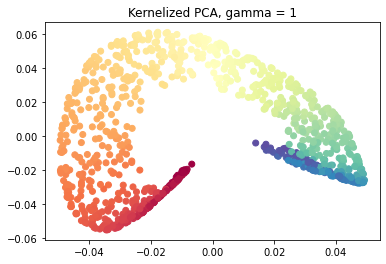

In [5]:
Y = stepwise_kpca(X, gamma=1, n_components=2)[0]
plt.title('Kernelized PCA, gamma = 1')
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral);
plt.show()

C:\Users\Joe Cruz\Anaconda2\envs\Python3_2\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
C:\Users\Joe Cruz\Anaconda2\envs\Python3_2\lib\site-packages\ipykernel_launcher.py:40: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


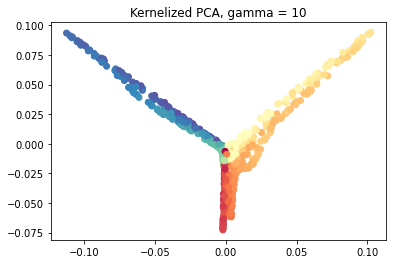

In [6]:
Y = stepwise_kpca(X, gamma=10, n_components=2)[0]
plt.title('Kernelized PCA, gamma = 10')
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral);
plt.show()

C:\Users\Joe Cruz\Anaconda2\envs\Python3_2\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_neighbors=10, n_components=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


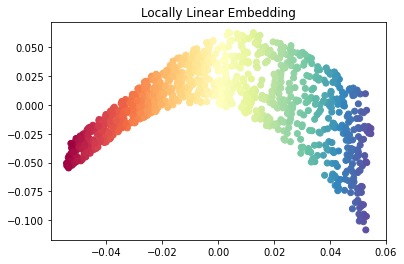

In [7]:
Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                    eigen_solver='auto',
                                    method='standard').fit_transform(X)
plt.title('Locally Linear Embedding')
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral);

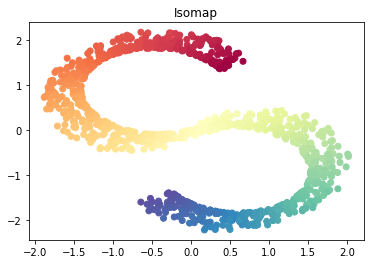

In [8]:
Y = manifold.MDS(n_components, max_iter=100, n_init=1).fit_transform(X)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap");

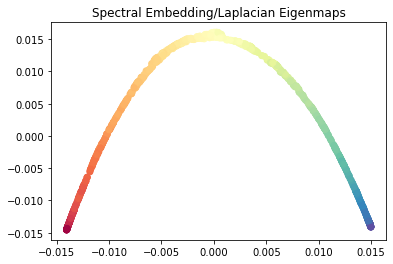

In [9]:
Y = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors).fit_transform(X)

plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Spectral Embedding/Laplacian Eigenmaps");

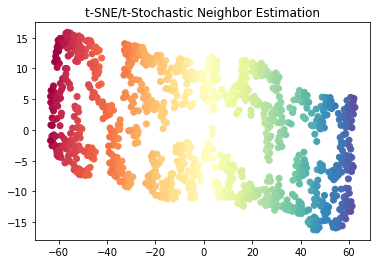

In [10]:
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(X)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE/t-Stochastic Neighbor Estimation");

## Simple 1D Regression (using Least-Squares)

In this section we use the Advertising data from Hastie/Tibshirani book <a href="http://www-bcf.usc.edu/~gareth/ISL/data.html">An Introduction to Statistical Learning</a>.

In [11]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection

np.random.seed(47)

advertising = pd.read_csv('Advertising.csv',usecols=(1,2,3,4))

X = np.array(advertising['TV']).reshape(-1,1)
y = np.array(advertising['Sales'])

advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


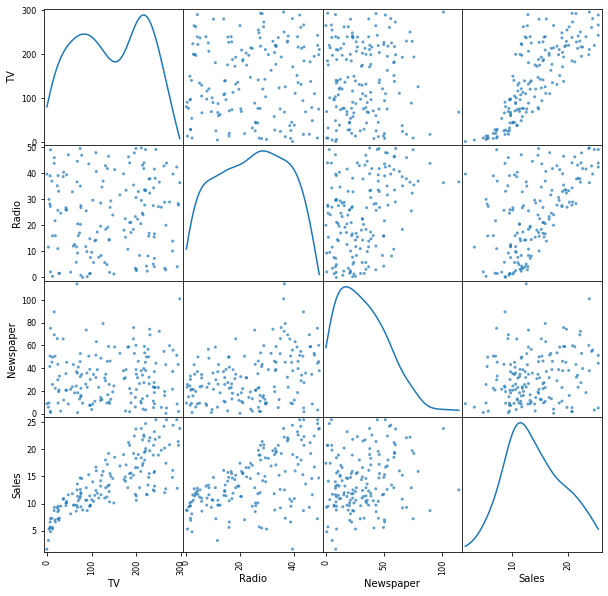

In [12]:
from pandas.plotting import scatter_matrix
scatter_matrix(advertising.loc[:160], alpha=0.7, figsize=(10, 10), diagonal='kde');

In [13]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=5)

In [14]:
from sklearn.linear_model import LinearRegression
%time regr = LinearRegression().fit(X_train,y_train)

Wall time: 1 ms


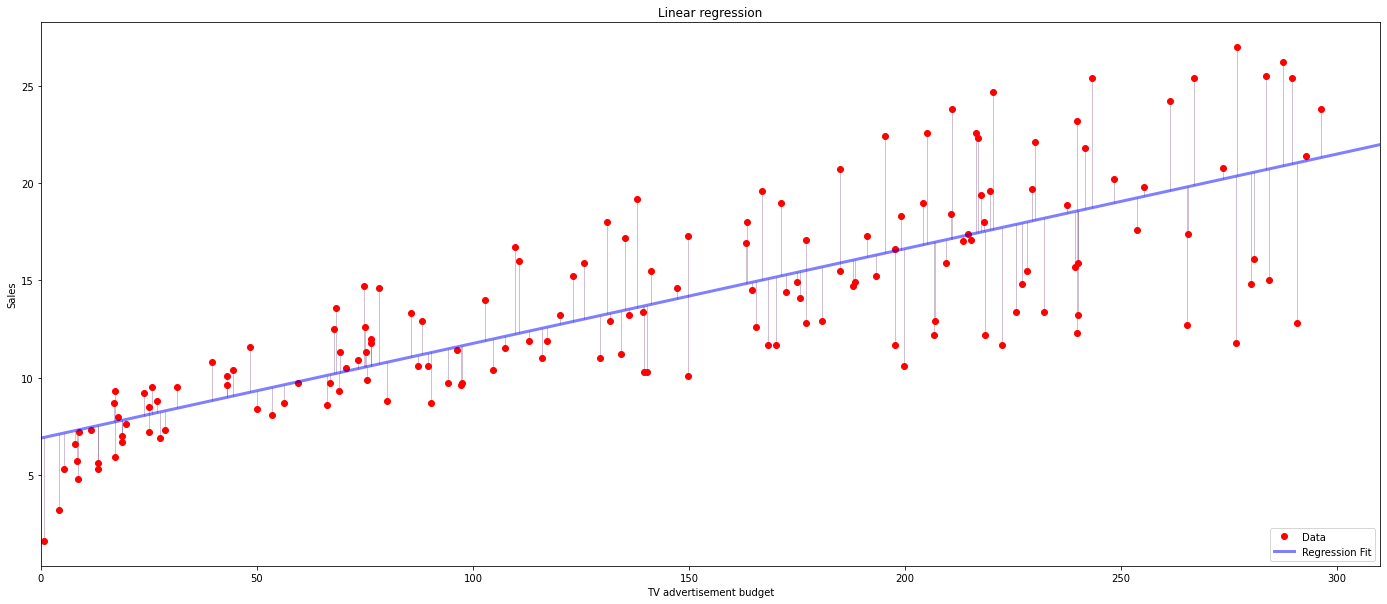

In [15]:
from matplotlib.collections import LineCollection

y_predicted = regr.predict(X_train)
N = len(y_train)

segments = [[[X_train[i], y_train[i]], [X_train[i], y_predicted[i]]] for i in range(N)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y_train)))
lc.set_alpha(0.5)
lc.set_linewidths(0.5 * np.ones(len(y_train)))

fig = plt.figure(figsize=[24,10])
# plot the training data
plt.plot(X_train, y_train, 'r.', markersize=12)
# plot the prediction line
x_lin = np.linspace(0,320,1000).reshape(-1,1)
plt.plot(x_lin, regr.predict(x_lin), color='blue',linewidth=3,alpha=0.5)
# plot the redisuals
plt.gca().add_collection(lc)

plt.xlim([0,310])
plt.xlabel('TV advertisement budget')
plt.ylabel('Sales')
plt.legend(('Data', 'Regression Fit'), loc='lower right')
plt.title('Linear regression')

# plot the regression line
plt.show()

In [16]:
# The mean square error
print ("Residual sum of squares: %0.2f" % (np.mean((regr.predict(X_test) - y_test) ** 2)))
# Explained variance score: 1 is perfect prediction
print ('Variance score: %.2f' % regr.score(X_test, y_test))

Residual sum of squares: 12.58
Variance score: 0.50


# 2D polynomial regression using least-squares

In [17]:
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

X = np.array(advertising[['TV','Radio']])
y = np.array(advertising['Sales'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=9)

# pipeline with polynomial regression
regr = Pipeline([('poly', PolynomialFeatures(degree=1)),
                  ('linear', LinearRegression(fit_intercept=True))])

%time regr = regr.fit(X_train,y_train)
y_predicted = regr.predict(X_train)

Wall time: 1 ms


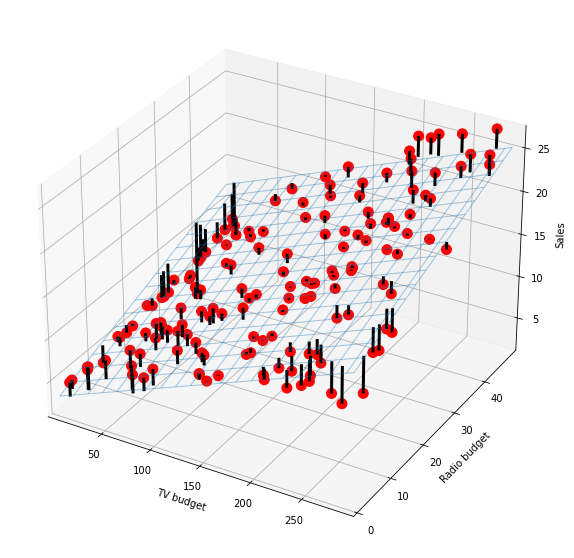

In [18]:
# create 3d line segments for residuals
segments_a = np.concatenate((X_train,y_train.reshape(-1,1)),axis=1)
segments_b = np.concatenate((X_train,y_predicted.reshape(-1,1)),axis=1)

segments = np.array([])
for i in range(len(segments_a)):
    segments = np.append(segments,np.array([segments_a[i],segments_b[i]]))
segments = np.vsplit(segments.reshape(segments_a.shape[0]*2,segments_a.shape[1])
                     ,len(segments_a))

# create a 3D meshgrid
X1, X2 = np.mgrid[X_train[:,0].min():X_train[:,0].max():1, 
                  X_train[:,0].min():X_train[:,1].max():1]
pos = np.empty(X1.shape + (2,))
pos[:, :, 0] = X1; pos[:, :, 1] = X2

Z = regr.predict(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)

fig = plt.figure(figsize=[24,10])
ax = fig.gca(projection='3d')

# plot the regression plane
ax.plot_wireframe(X1, X2, Z, rstride=15, cstride=3, alpha=0.4, linewidth=1)
# plot the points
ax.scatter(X_train[:,0],X_train[:,1],y_train,c='r',s=100,alpha=1,zorder=10000)

# Create the 3D-line collection object
lc = Line3DCollection(segments)
lc.set_color('k')
lc.set_linewidth(3)
ax.add_collection3d(lc)

ax.set_xlabel('TV budget'); ax.set_xlim(X_train[:,0].min(), X_train[:,0].max())
ax.set_ylabel('Radio budget'); ax.set_ylim(X_train[:,1].min(), X_train[:,1].max())
ax.set_zlabel('Sales');  ax.set_zlim(y_train.min(), y_train.max())

plt.show()

In [19]:
# The mean square error
print ("Residual sum of squares: %.2f" % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print ('Variance score: %.2f' % regr.score(X_test, y_test))

Residual sum of squares: 1.83
Variance score: 0.93


## Parametric Classification Revisited

In the following plot, we see two bivariate Gaussian distribtuions from the homework last week.

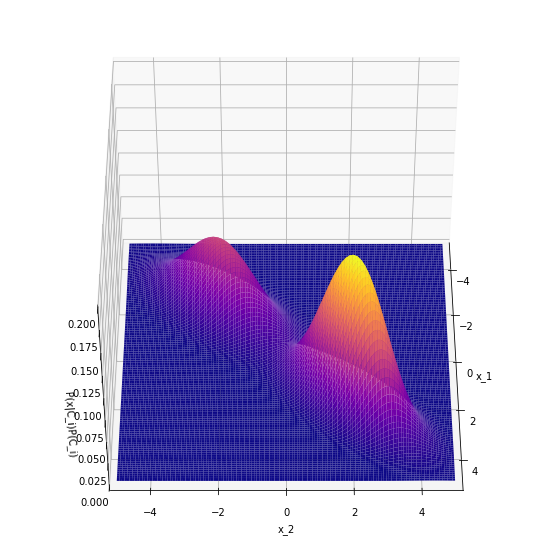

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from scipy.stats import multivariate_normal

fig = plt.figure(figsize=[24,10])
ax = fig.gca(projection='3d')

X1, X2 = np.mgrid[-5:5:0.075, -5:5:0.075]
pos = np.empty(X1.shape + (2,))
pos[:, :, 0] = X1; pos[:, :, 1] = X2

Z1 = multivariate_normal([-2, -2], [[0.9, 0.7], [0.7, 1.2]]).pdf(pos)*0.4
Z2 = multivariate_normal([2, 2], [[0.75, 0.6], [0.6, 0.9]]).pdf(pos)*0.6

Z = Z1+Z2
ax.plot_surface(X1, X2, Z, rstride=1, cstride=1, alpha=1, cmap=plt.cm.plasma, antialiased=True)

ax.set_xlabel('x_1'); ax.set_xlim(-5, 5)
ax.set_ylabel('x_2'); ax.set_ylim(-5, 5)
ax.set_zlabel('P(x|C_i)P(C_i)');  ax.set_zlim(0, 0.2)

ax.view_init(45, 0)

plt.show()

Then we see a quadratic discriminant is formed when we use the entire covariance matrices for each class.

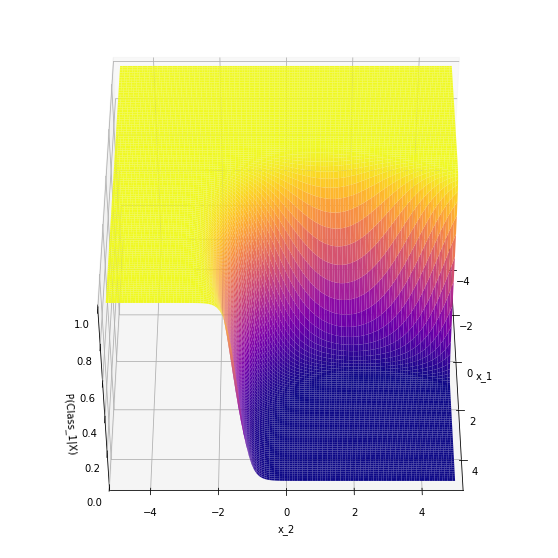

In [21]:
fig = plt.figure(figsize=[24,10])
ax = fig.gca(projection='3d')

Z1 = multivariate_normal([-2, -2], [[0.9, 0.7], [0.7, 1.2]]).pdf(pos)*0.4
Z2 = multivariate_normal([2, 2], [[0.75, 0.6], [0.6, 0.9]]).pdf(pos)*0.6

Z = Z1/(Z1+Z2)

ax.plot_surface(X1, X2, Z, rstride=1, cstride=1, alpha=1, cmap=plt.cm.plasma)

ax.set_xlabel('x_1'); ax.set_xlim(-5, 5)
ax.set_ylabel('x_2'); ax.set_ylim(-5, 5)
ax.set_zlabel('P(Class_1|X)');  ax.set_zlim(0, 1)

ax.view_init(45, 0)

plt.show()

Then we see a linear discriminant is formed when we weight the covariance matrices by the prior probabilities and add them together.

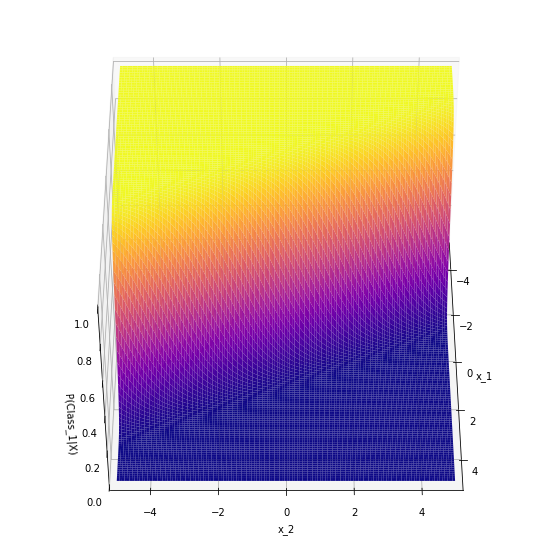

In [22]:
fig = plt.figure(figsize=[24,10])
ax = fig.gca(projection='3d')

Z1 = multivariate_normal([-2, -2], [[0.81, 0.64], [0.64, 1.02]]).pdf(pos)*0.4
Z2 = multivariate_normal([2, 2], [[0.81, 0.64], [0.64, 1.02]]).pdf(pos)*0.6

Z = Z1/(Z1+Z2)

ax.plot_surface(X1, X2, Z, rstride=1, cstride=1, alpha=1, cmap=plt.cm.plasma, antialiased=True)

ax.set_xlabel('x_1'); ax.set_xlim(-5, 5)
ax.set_ylabel('x_2'); ax.set_ylim(-5, 5)
ax.set_zlabel('P(Class_1|X)');  ax.set_zlim(0, 1)

ax.view_init(45, 0)

plt.show()

In the Naive case, we also get a discrminant with a curve, but we do not estimate the covariance between the dimensions.

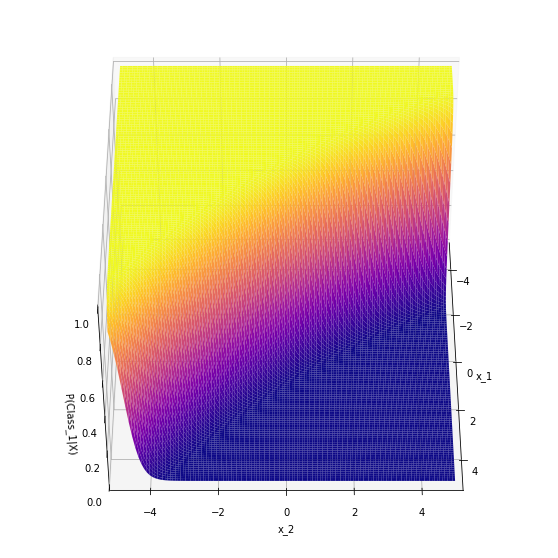

In [23]:
fig = plt.figure(figsize=[24,10])
ax = fig.gca(projection='3d')

Z1 = multivariate_normal([-2, -2], [[0.9, 0], [0, 1.2]]).pdf(pos)*0.4
Z2 = multivariate_normal([2, 2], [[0.75, 0], [0, 0.9]]).pdf(pos)*0.6

Z = Z1/(Z1+Z2)

ax.plot_surface(X1, X2, Z, rstride=1, cstride=1, alpha=1, cmap=plt.cm.plasma, antialiased=True)

ax.set_xlabel('x_1'); ax.set_xlim(-5, 5)
ax.set_ylabel('x_2'); ax.set_ylim(-5, 5)
ax.set_zlabel('P(Class_1|X)');  ax.set_zlim(0, 1)

ax.view_init(45, 0)

plt.show()

## Logistic Regression

For multiclass logistic regression, Sci-kit learn uses a one vs. rest approach.

In [158]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from mlclass2 import simplemetrics, plot_decision_2d_lda
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import axes3d

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
X = np.array(df[[0,1,2,3]])

class_le = LabelEncoder()
y = class_le.fit_transform(df[4].values)

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=50)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_pca = pca.transform(X)

stdscaler = preprocessing.StandardScaler().fit(X_train_pca)
X_scaled  = stdscaler.transform(X_pca)
X_train_scaled = stdscaler.transform(X_train_pca)
X_test_scaled  = stdscaler.transform(X_test_pca)

from sklearn.linear_model import LogisticRegression
# regular
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
predicted = lr.predict(X_test_scaled)

Then we plot the decision boundaries:

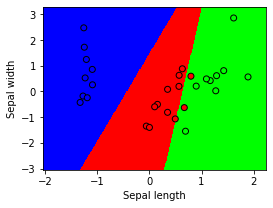

In [169]:
h = 0.01
x_min, x_max = X_train_scaled[:, 0].min() - .5, X_train_scaled[:, 0].max() + .5
y_min, y_max = X_train_scaled[:, 1].min() - .5, X_train_scaled[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, shading = 'auto', cmap=plt.cm.brg)

# Plot also the training points
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.brg)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In 3d, we can get a good sense of the probabilities as well. Here I am only showing the surface formed by the max probabilities of the classes.

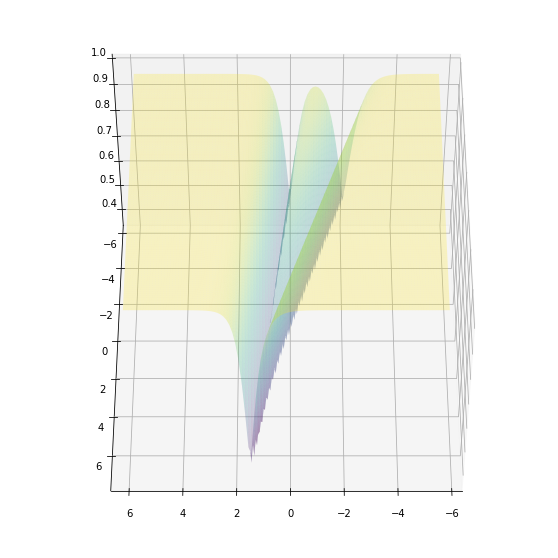

In [144]:
fig = plt.figure(figsize=[24,10])
ax = fig.gca(projection='3d')

X1, X2 = np.mgrid[X_scaled[:,0].min()-4:X_scaled[:,0].max()+4:0.1, X_scaled[:,0].min()-4:X_scaled[:,1].max()+4:0.1]
pos = np.empty(X1.shape + (2,))
pos[:, :, 0] = X1; pos[:, :, 1] = X2

Z = lr.predict_proba(np.c_[X1.ravel(), X2.ravel()])
Z_0 = Z[:,0].reshape(X1.shape)
Z_1 = Z[:,1].reshape(X1.shape)
Z_2 = Z[:,2].reshape(X1.shape)

Z = np.maximum(Z_0,Z_1)
Z = np.maximum(Z,Z_2)

ax.plot_surface(X1, X2, Z, rstride=1, cstride=1, alpha=0.25, cmap=plt.cm.viridis, antialiased=True)

ax.view_init(50, 90)

plt.show()

## Softmax Regression

In [27]:
# softmax regression
lr = LogisticRegression(multi_class='multinomial',solver='lbfgs')
lr.fit(X_train_scaled, y_train)
predicted = lr.predict(X_test_scaled)

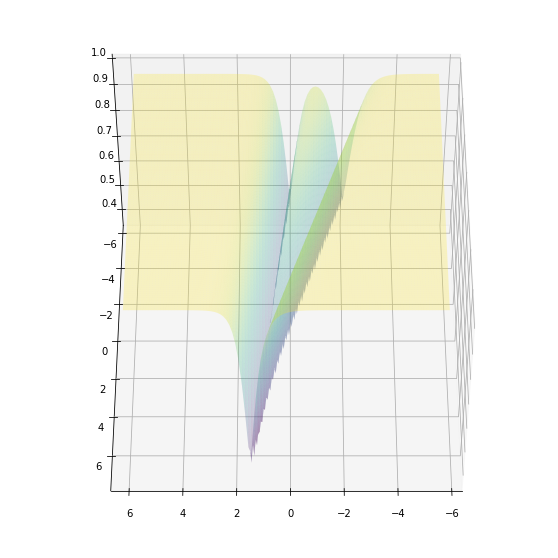

In [28]:
fig = plt.figure(figsize=[24,10])
ax = fig.gca(projection='3d')

X1, X2 = np.mgrid[X_scaled[:,0].min()-4:X_scaled[:,0].max()+4:0.1, X_scaled[:,0].min()-4:X_scaled[:,1].max()+4:0.1]
pos = np.empty(X1.shape + (2,))
pos[:, :, 0] = X1; pos[:, :, 1] = X2

Z = lr.predict_proba(np.c_[X1.ravel(), X2.ravel()])
Z_0 = Z[:,0].reshape(X1.shape)
Z_1 = Z[:,1].reshape(X1.shape)

Z = np.maximum(Z_0,Z_1)
Z = np.maximum(Z,Z_2)

ax.plot_surface(X1, X2, Z, rstride=1, cstride=1, alpha=0.25, cmap=plt.cm.viridis, antialiased=True)

ax.view_init(50, 90)

plt.show()

## Introduction to Keras

In [130]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
X = df.iloc[0:100, [0,1,2,3]].values
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

##### In Keras, all Pandas DataFrames must be converted to Numpy Arrays.  ####

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=50)

stdscaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = stdscaler.transform(X_train)
X_test_scaled  = stdscaler.transform(X_test)

In [131]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from keras.optimizers import SGD

# Stochastic Logistic Regression
model = Sequential()


# validation loss 
model.add(Dense(1, activation='sigmoid', input_shape=[X_train_scaled.shape[1]],kernel_regularizer=l1(0.01)))


# Compile model
sgd = SGD(lr=0.1)
model.compile(loss='mean_squared_error', optimizer=sgd)
model.layers

In [104]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [105]:
# Fit the model
history = model.fit(X_train_scaled, y_train, batch_size = 256,
          epochs = 200, verbose=0, validation_data=(X_test_scaled,y_test))

Loss after final iteration:  0.010248265229165554


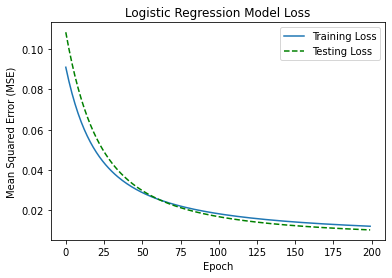

In [129]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('Logistic Regression Model Loss')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print( "Loss after final iteration: ", history.history['val_loss'][-1])
plt.show()

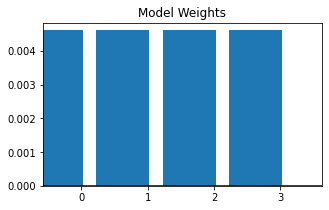

In [109]:
fig = plt.figure(figsize=(5,3))
ax = fig.gca()
plt.plot([-0.2,4],[0,0],color='k')
plt.xlim([-0.2,4])
plt.title('Model Weights')
ax.set_xticks([0.375,1.375,2.375,3.375])
ax.set_xticklabels([0,1,2,3])
plt.bar(range(len(model.get_weights()[0])), model.get_weights()[1]);

## <span style="color:red">Programming Assignment 4: Logistic Regression on the notMIST dataset</span>

For this assignment, we will perform logistic regression on the notMIST dataset using Keras. I have included the code to import the dataset and display the images. Since these images are black and white matrices, we flatten them to a vector so they can be used with logistic regression. I also include the code to do the training and testing split.

Create a logistic regression model using Keras. In the first and only layer, set the only layer to:

<code>model.add(Dense(output_dim=10, input_shape=[784], 
                activation='sigmoid', W_regularizer=l2(0.01)))</code>

Train the model for 100 iterations (<code>nb_epoch</code>). Change the loss function to <code>'categorical_crossentropy'</code>. 

Display the loss after the final iteration and plot the training and testing loss, as above. Be sure to change the loss function label on the plot.

In [122]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import model_selection
from scipy.io import loadmat
data = loadmat('notMNIST_small.mat')
X_temp = data['images']/255

#for i in range(X_temp.shape[2]):
    
X = np.empty(shape=[X_temp.shape[2]] + [784], dtype='float32')
for i in range(X_temp.shape[2]):
    X[i,:] = X_temp[:,:,i].flatten()

y = pd.get_dummies(data['labels']).to_numpy()

print (X_temp.shape)
print (X.shape)
print (y.shape)
X[1,:]

(28, 28, 18724)
(18724, 784)
(18724, 10)


array([0.        , 0.00392157, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03137255, 0.16078432, 0.38039216, 0.6509804 , 0.87058824,
       0.9764706 , 0.90588236, 0.6627451 , 0.4       , 0.11764706,
       0.        , 0.00784314, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.07450981,
       0.3647059 , 0.44313726, 0.42745098, 0.4627451 , 0.5019608 ,
       0.54509807, 0.6392157 , 0.77254903, 0.8627451 , 0.9607843 ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99607843, 1.        , 0.94509804, 0.42352942, 0.        ,
       0.00392157, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01176471, 0.654902  , 1.        , 0.9843137 ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99607843, 0.98039216, 0.972549  ,
       0.99215686, 1.        , 0.99607843, 0.9882353 , 0.99215

In [123]:
y


array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=uint8)

(28, 28)


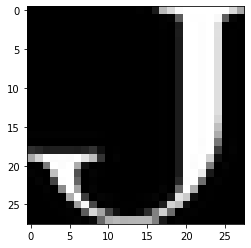

In [125]:
print(X_temp[:,:,3].shape)
plt.imshow(X_temp[:,:,3],cmap="gray");

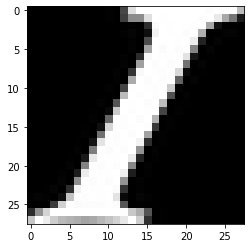

In [126]:
plt.imshow(X_temp[:,:,4504],cmap="gray");

In [128]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=50)
print (X_train.shape)
print (y_train.shape)

(14979, 784)
(14979, 10)


In [ ]:
# Implement your code here